## Imports and Paths

In [8]:
# imports
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm 
from datetime import datetime


In [9]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# set paths
data_path="drive/MyDrive/Work/Frontline/data/filtered_4_25"



### Read & Combine Data


In [11]:
from ast import literal_eval


In [12]:
dfs = []

# loop through files 
for filename in os.listdir(data_path):
    # if csv file, load and add to dfs  
    if filename.endswith(".csv"):
        file_path = os.path.join(data_path, filename)
        df = pd.read_csv(file_path, index_col=0)
        dfs.append(df)

# combine files in df
df = pd.concat(dfs, ignore_index=True)

### Data  and Plots

Wie viele Artikel gibt es über häusliche Gewalt?

In [13]:
print(f"Es gibt {len(df)} Artikel zum Thema häusliche Gewalt, die in {len(df.name.value_counts())} Zeitungen erschienen")

Es gibt 72695 Artikel zum Thema häusliche Gewalt, die in 179 Zeitungen erschienen


Wie viele Artikel veröffentlichen Zeitungen über häusliche Gewalt?




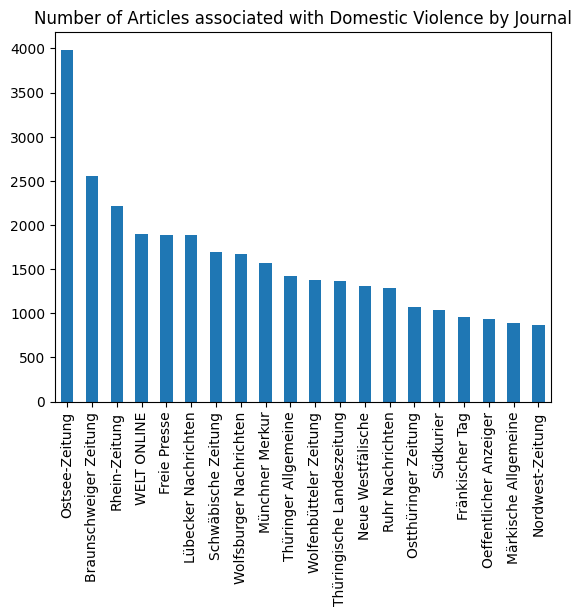

In [14]:
df["name"].value_counts()[:20].plot(kind="bar", title="Number of Articles associated with Domestic Violence by Journal");

In [15]:
df["name"].value_counts() 

Ostsee-Zeitung            3987
Braunschweiger Zeitung    2555
Rhein-Zeitung             2215
WELT ONLINE               1896
Freie Presse              1891
                          ... 
ZEIT Wissen                  2
Audio Video Foto Bild        2
Spiegel Start                1
ZEIT Studienführer           1
ZEIT Geschichte              1
Name: name, Length: 179, dtype: int64

In welchen Ressorts wird veröffentlicht?


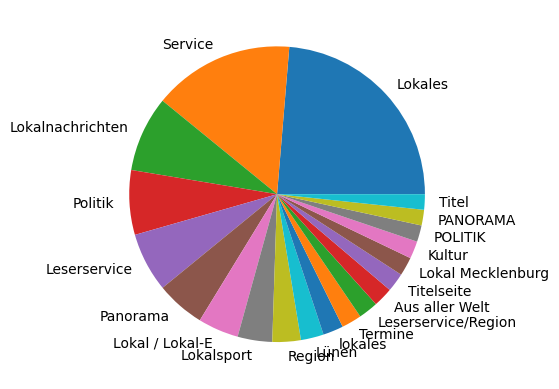

In [16]:
plt.pie(df.ressort.value_counts()[:20],labels =df.ressort.value_counts()[:20].index);

Wann werden Zeitungen veröffentlicht?

In [17]:
## articles without date
df.datum.isna().sum()

0

In [18]:
dates=df[~df.datum.isna()].datum.astype(int)
dates=pd.to_datetime(dates, format="%Y%m%d")

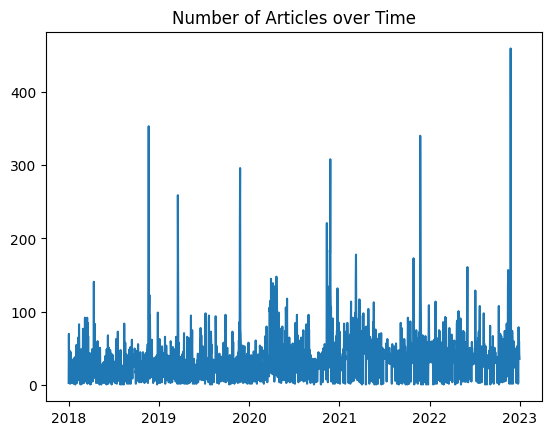

In [19]:
lists = sorted(dict(Counter(dates)).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot([pd.to_datetime(i) for i in x], y)
plt.title("Number of Articles over Time")
plt.show("bar")

In [20]:
dates_month=[i.to_period("M") for i in dates]
dates_month=pd.DataFrame(dates_month)[0]

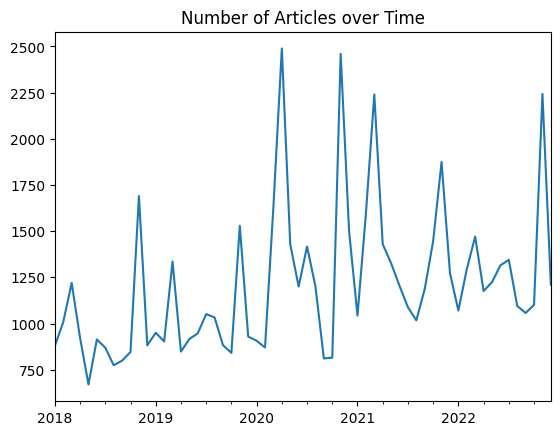

In [21]:
dates_month.value_counts().sort_index().plot(title="Number of Articles over Time");

What are the peaks? (95%-quantiles)

In [22]:
dates_month.value_counts()[dates_month.value_counts()>dates_month.value_counts().quantile(0.95)].sort_index()

2020-04    2489
2020-11    2460
2022-11    2243
Freq: M, Name: 0, dtype: int64

Länge der Artikel

In [23]:
lengths=[len(("".join(i).split(" "))) for i in df.text]
lengths_rounded=[round(i)for i in lengths]

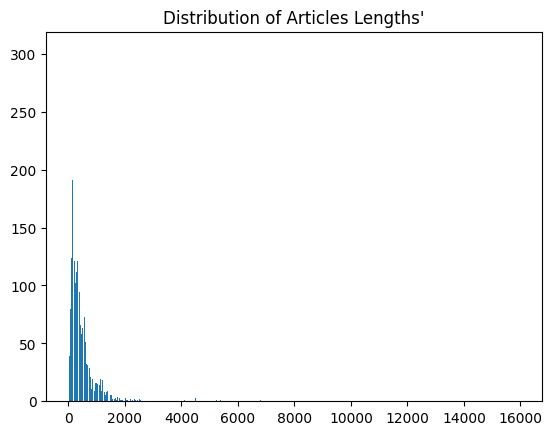

In [24]:
plt.bar(dict(Counter(lengths_rounded)).keys(),dict(Counter(lengths_rounded)).values());
plt.title("Distribution of Articles Lengths'");

Are there outliers?

In [25]:
idx=[i>10000 for i in lengths]
print(f"{df[idx].shape[0]} articles have a length of >10000 words")


4 articles have a length of >10000 words


In [ ]:
df[idx]#.iloc[2]["text"]